In [1]:
import pandas as pd
import numpy as np

# calculate volatility manually

In [2]:
prices = pd.read_csv('data/sample_prices.csv')
prices

,BLUE,ORANGE
0,8.7000,10.6600
1,8.9055,11.0828
2,8.7113,10.7100
3,8.4346,11.5907
4,8.7254,12.1070
5,9.0551,11.7876
6,8.9514,11.2078
7,9.2439,12.5192
8,9.1276,13.3624
9,9.3976,14.4080


In [3]:
prices.pct_change().std()

BLUE      0.023977
ORANGE    0.079601
dtype: float64

In [4]:
returns = prices.pct_change().dropna()
print(returns)
deviation = returns-returns.mean()
sqrd_deviation = deviation**2
variance = sqrd_deviation.sum()/(returns.shape[0]-1)
std = variance**0.5
std

        BLUE    ORANGE
1   0.023621  0.039662
2  -0.021807 -0.033638
3  -0.031763  0.082232
4   0.034477  0.044544
5   0.037786 -0.026381
6  -0.011452 -0.049187
7   0.032676  0.117008
8  -0.012581  0.067353
9   0.029581  0.078249
10  0.006151 -0.168261
11  0.012162  0.024041
12  0.021149 -0.055623


BLUE      0.023977
ORANGE    0.079601
dtype: float64

In [5]:
annualized_vol = std*np.sqrt(12)
annualized_vol

BLUE      0.083060
ORANGE    0.275747
dtype: float64

# Calculate annualized return

In [6]:
df = pd.read_csv('data/Portfolios_Formed_on_ME_monthly_EW.csv', index_col=0)
df

,<= 0,Lo 30,Med 40,Hi 30,Lo 20,Qnt 2,Qnt 3,Qnt 4,Hi 20,Lo 10,Dec 2,Dec 3,Dec 4,Dec 5,Dec 6,Dec 7,Dec 8,Dec 9,Hi 10
192607,-99.99,-0.43,1.52,2.68,-0.57,0.59,1.60,1.47,3.33,-1.45,0.29,-0.15,1.33,1.24,1.98,1.55,1.38,3.38,3.29
192608,-99.99,3.90,3.04,2.09,3.84,3.59,3.71,1.61,2.33,5.12,2.59,4.03,3.15,2.72,4.72,1.60,1.63,0.98,3.70
192609,-99.99,-1.08,-0.54,0.16,-0.48,-1.40,0.00,-0.50,-0.09,0.93,-1.87,-2.27,-0.53,0.07,-0.07,-1.64,0.64,-0.86,0.67
192610,-99.99,-3.32,-3.52,-3.06,-3.29,-4.10,-2.89,-3.36,-2.95,-4.84,-1.77,-3.36,-4.83,-2.98,-2.80,-3.45,-3.27,-3.47,-2.43
192611,-99.99,-0.46,3.82,3.09,-0.55,2.18,3.41,3.39,3.16,-0.78,-0.32,-0.29,4.65,3.24,3.57,3.82,2.95,3.61,2.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201808,-99.99,3.47,4.04,2.87,3.09,5.05,3.90,3.54,2.49,2.41,5.07,5.30,4.70,3.02,5.01,3.50,3.58,2.65,2.34
201809,-99.99,-2.24,-1.85,0.08,-2.04,-2.38,-2.48,-0.74,0.19,-1.68,-3.08,-3.22,-1.23,-2.65,-2.27,-1.31,-0.12,-0.51,0.87
201810,-99.99,-10.76,-10.88,-7.63,-10.52,-11.74,-10.55,-9.45,-7.41,-10.02,-11.98,-11.89,-11.52,-11.58,-9.23,-10.74,-8.04,-8.28,-6.57
201811,-99.99,-2.08,2.18,2.19,-2.78,1.69,1.46,2.62,2.49,-3.65,-0.23,1.23,2.30,1.74,1.11,3.54,1.63,2.45,2.53


In [7]:
df = pd.DataFrame(data=df[['Lo 10', 'Hi 10']])
df.columns = ['low cap', 'large cap']
returns = df/100

In [8]:
returns 

,low cap,large cap
192607,-0.0145,0.0329
192608,0.0512,0.0370
192609,0.0093,0.0067
192610,-0.0484,-0.0243
192611,-0.0078,0.0270
...,...,...
201808,0.0241,0.0234
201809,-0.0168,0.0087
201810,-0.1002,-0.0657
201811,-0.0365,0.0253


In [9]:
return_per_month = np.prod(1+ returns)**(1/returns.shape[0]) - 1
return_per_month

low cap      0.012986
large cap    0.007423
dtype: float64

In [10]:
annualized_return = (1+return_per_month)**12 -1
annualized_return

low cap      0.167463
large cap    0.092810
dtype: float64

# Calculate Sharpe Ratio

In [11]:
vol = returns.std()
annualized_vol = vol*np.sqrt(12)
annualized_vol

low cap      0.368193
large cap    0.186716
dtype: float64

In [12]:
risk_ratio_return = annualized_return/annualized_vol
risk_ratio_return

low cap      0.454825
large cap    0.497063
dtype: float64

In [13]:
risk_free_rate = 0.03
sharpe_ratio = (annualized_return-risk_free_rate)/annualized_vol
sharpe_ratio

low cap      0.373346
large cap    0.336392
dtype: float64

<AxesSubplot:>

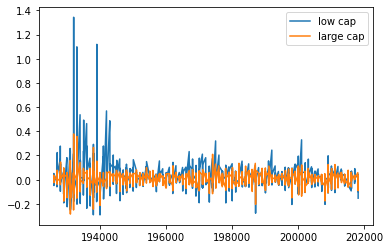

In [14]:
returns.plot()

<AxesSubplot:>

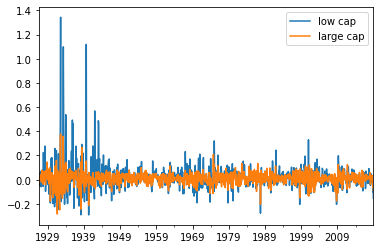

In [15]:
# get the index values per each month
returns.index = pd.to_datetime(returns.index, format='%Y%m').to_period('M')
returns.plot()

# Calculate drawdowns
   1. Claculate wealth index
   2. Calculate previous peaks
   3. Compute drawdown

In [16]:
init_wealth = 100

wealth_index = 100*(1+returns['large cap']).cumprod()

<AxesSubplot:>

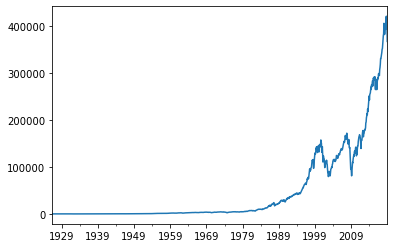

In [17]:
wealth_index.plot()

<AxesSubplot:>

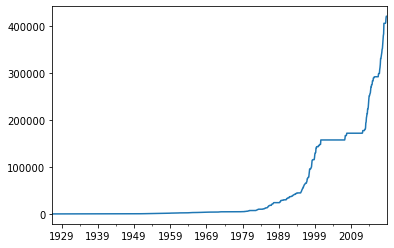

In [18]:
max_wealth = wealth_index.cummax()
max_wealth.plot()

<AxesSubplot:>

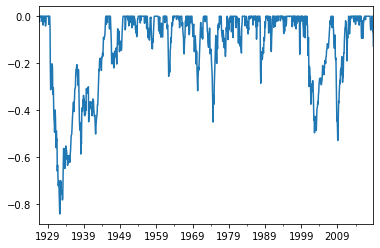

In [19]:
drawdown = (wealth_index-max_wealth)/max_wealth
drawdown.plot()

In [20]:
drawdown['1980':].min()

-0.5280945042309304

In [21]:
drawdown['1980':].idxmin()

Period('2009-02', 'M')

In [22]:
def drawdown(column, init_wealth):
    wealth_index = init_wealth*(1+returns[column]).cumprod()
    previous_peaks = wealth_index.cummax()
    return pd.DataFrame({'wealth': np.array(wealth_index).astype(np.int64), 
                         'peaks': np.array(previous_peaks).astype(np.int64), 
                         'drawdown':(wealth_index-previous_peaks)/previous_peaks})

<AxesSubplot:>

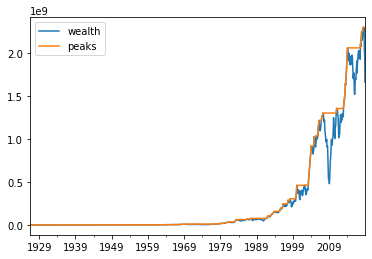

In [23]:
drawdown('low cap', 1000)[['wealth', 'peaks']].plot()